<a href="https://colab.research.google.com/github/psst54/startTensor/blob/master/ch5_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

print(len(train_X), len(test_X))

60000 10000


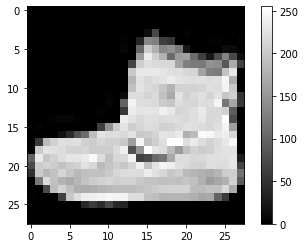

9


In [4]:
plt.imshow(train_X[0], cmap = 'gray')
plt.colorbar()
plt.show()

print(train_Y[0])

In [5]:
train_X = train_X / 255.0
test_X = test_X / 255.0

print(train_X[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [7]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape = (28, 28)),
                             tf.keras.layers.Dense(units = 128, activation = 'relu'),
                             tf.keras.layers.Dense(units = 10, activation = 'softmax')
])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(train_X, train_Y, epochs = 25, validation_split = 0.25)

Epoch 1/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.5267 - accuracy: 0.8148 - val_loss: 0.4104 - val_accuracy: 0.8546
Epoch 2/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3891 - accuracy: 0.8604 - val_loss: 0.3672 - val_accuracy: 0.8705
Epoch 3/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3498 - accuracy: 0.8731 - val_loss: 0.3554 - val_accuracy: 0.8698
Epoch 4/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3257 - accuracy: 0.8814 - val_loss: 0.3357 - val_accuracy: 0.8760
Epoch 5/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3033 - accuracy: 0.8885 - val_loss: 0.3359 - val_accuracy: 0.8789
Epoch 6/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2883 - accuracy: 0.8940 - val_loss: 0.3399 - val_accuracy: 0.8777
Epoch 7/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2745 - accuracy: 0.8988 - val_loss: 0.3283 - val_accuracy:

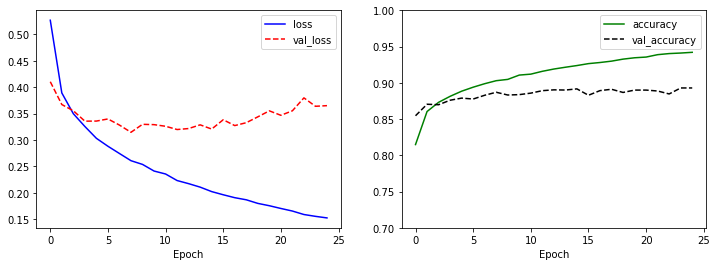

In [9]:
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [10]:
model.evaluate(test_X, test_Y)

313/313 [==============================] - 0s 1ms/step - loss: 0.3923 - accuracy: 0.8872


[0.3923057019710541, 0.8871999979019165]

In [20]:
# using callbacks

history = model.fit(train_X, train_Y, epochs = 25, validation_split = 0.25, callbacks = [tf.keras.callbacks.EarlyStopping(patience = 3, monitor = 'val_loss')])

Epoch 1/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.0759 - accuracy: 0.9720 - val_loss: 0.5491 - val_accuracy: 0.8892
Epoch 2/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.0773 - accuracy: 0.9714 - val_loss: 0.5859 - val_accuracy: 0.8810
Epoch 3/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.0739 - accuracy: 0.9730 - val_loss: 0.5370 - val_accuracy: 0.8896
Epoch 4/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.0706 - accuracy: 0.9740 - val_loss: 0.5675 - val_accuracy: 0.8917
Epoch 5/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.0721 - accuracy: 0.9728 - val_loss: 0.5760 - val_accuracy: 0.8878
Epoch 6/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.0712 - accuracy: 0.9732 - val_loss: 0.5782 - val_accuracy: 0.8850


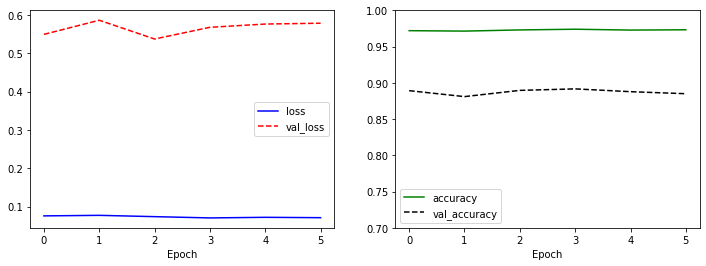

In [21]:
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [22]:
model.evaluate(test_X, test_Y)

313/313 [==============================] - 0s 1ms/step - loss: 0.6306 - accuracy: 0.8822


[0.6306304335594177, 0.8822000026702881]